# The model thinker - Scott E. Page

https://www.coursera.org/learn/model-thinking/home/welcome

https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/ LaTeX

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sympy as sp
sp.init_printing()
import networkx as nx

## 11. Broadcast, Diffusion, and Contagion

Se modela el spread (esparcimiento) de informacion, tecnologias, comportamientos, creencias y enfermedades a traves de una poblacion, usando modelos de transmision, difusion y contagio. Estos modelos juegan un rol fundamental en la comunicacion, el marketing y la epidemiologia. 

Estos modelos **particionan la poblacion entre los que saben/tienen y los que no. Con el tiempo, los individuos se mueven entre los grupos/estados**.

**Curva de adopcion**: plot empirico sobre la cantidad de individuos que pasan al estado "activo". Suele ser concavo o con forma de S. Depende de la forma en la que la gente pasa a ese estado (por broadcast o difusion).

> **Broadcasting (transmision):** cuando la gente escucha una idea o se agarra una enfermedad **desde una unica fuente**. Produce plots con forma de r.

> **Diffussion (difusion):** cuando la gente lo hace mediante el contacto, se va **pasando de persona a persona**. Produce plots con forma de S.

> **Bass model:** se expanden por ambas **(broadcasting y diffussion)**. La forma del plot depende del peso que tenga cada mecanismo de expansion.

> **SIR (contagio):** incluye una tasa de recuperacion, puede ser el sistema inmune, que algo pase de moda, que algo se pierda, baje su caildad, informacion perdiendo su valor, etc. El modelo produce un **tipping point**, donde cambios pequeños en los atributos produce el exito o el fracaso (como por ejemplo un pequeño cambio en la probabilidad de que se comente sobre un nuevo lugar puede terminar en una gran diferencia de marketing a favor.

#### Links:

Notebook NetworkX
https://www.youtube.com/watch?v=gxAaO2rsdIs&t=701s 3b1b
https://www.youtube.com/watch?v=sPeMBB7qkmI&feature=emb_logo pablo groisman
https://towardsdatascience.com/random-walks-with-python-8420981bc4bc random walk 2d

### Broadcast Model

Hay una poblacion $N$, en cada momento $t$, una cantidad de esa poblacion sabe la info/tiene la enfermedad, $I_t$. El resto de la poblacion son susceptibles de adquirirlo, $S_t$. $N=I_t+S_t$. Para saber **la cantidad de gente que va a estar infectada en t+1, $I_{t+1}$.**:

#### $$I_{t+1} = I_{t} + P_{broad} * S_{t}$$

$P_{broad}$ es la probabilidad de la transmision (puede ser la probabilidad de que una persona escuche una noticia por television o que tome un agua que esta contaminada).

Captra la transmision de ideas, rumores, informacion, tecnologia mediante medios como la tele, radio, internet. Una fuente, como el gobierno, una empresa o diario expande la informacion. O contaminacion por una fuente de agua. **No se aplica a los que se contagia de persona a persona**.


#### Calculandolo secuencialmente

In [329]:
t= np.arange(1,20,1)
p= 0.15
s=1000000

df= pd.DataFrame({'t':t})
df['I']= 0
df['S']= 1000000
df['p']=p

for i in t:
    df.loc[i,'I']= df.loc[i-1,'I'] + p * df.loc[i-1,'S']
    df.loc[i,'S']= 1000000-df.loc[i,'I']

t= np.arange(1,20,1)
p= 0.05
s=1000000

df2= pd.DataFrame({'t':t})
df2['I']= 0
df2['S']= 1000000
df2['p']=p

for i in t:
    df2.loc[i,'I']= df2.loc[i-1,'I'] + p * df2.loc[i-1,'S']
    df2.loc[i,'S']= 1000000-df2.loc[i,'I']
    
t= np.arange(1,20,1)
p= 0.01
s=1000000

df3= pd.DataFrame({'t':t})
df3['I']= 0
df3['S']= 1000000
df3['p']=p

for i in t:
    df3.loc[i,'I']= df3.loc[i-1,'I'] + p * df3.loc[i-1,'S']
    df3.loc[i,'S']= 1000000-df3.loc[i,'I']

t= np.arange(1,20,1)
p= 0.25
s=1000000

df4= pd.DataFrame({'t':t})
df4['I']= 0
df4['S']= 1000000
df4['p']=p

for i in t:
    df4.loc[i,'I']= df4.loc[i-1,'I'] + p * df4.loc[i-1,'S']
    df4.loc[i,'S']= 1000000-df4.loc[i,'I']
    
df= pd.concat([df,df2,df3,df4])
df= df.dropna().reset_index(drop=True)

In [330]:
df= df.melt(id_vars=['t','p'], value_vars=['I','S'] ,var_name='Estado')

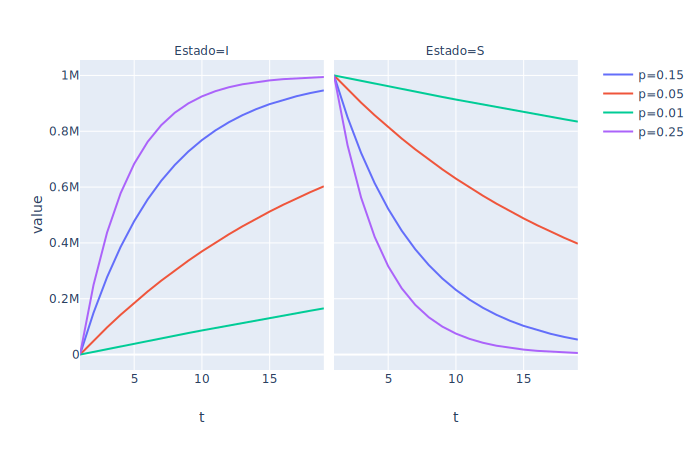

In [331]:
fig=px.line(df,x='t',y='value',color='p',facet_col='Estado', height=400,width=600)
fig.show(renderer="svg")

#### Calculandolo con una **difference equation**

Parto del crecimiento logistico porque es mas facil... y despues hago la resta para saber I.

- $S_t=S_0-I_t$
- $I_t=S_0-S_t$
- $S_t=S_0(1-p)^t$
- $I_t=S_0-[S_0(1-p)^t]$

Si hay un millon de habitantes, y se anuncia algo y la prob de escucharlo es de 15%, al primer dia, $I_1=S_0*0.15=150000$. Despues, el 30% **de los que quedan**, $850000=S_0(1-p)$, se le van a sumar a esos 150000, $I_2= I_1 + S_0(1-p)$...

In [332]:
t= np.arange(1,20,1)
p= 0.15
s=1000000

broad= pd.DataFrame({'t':t})
broad['S']= 100000*(1-p)**broad.t
broad['I']= 100000-broad.S
broad.head()

,t,S,I
0,1,85000.00000,15000.00000
1,2,72250.00000,27750.00000
2,3,61412.50000,38587.50000
3,4,52200.62500,47799.37500
4,5,44370.53125,55629.46875


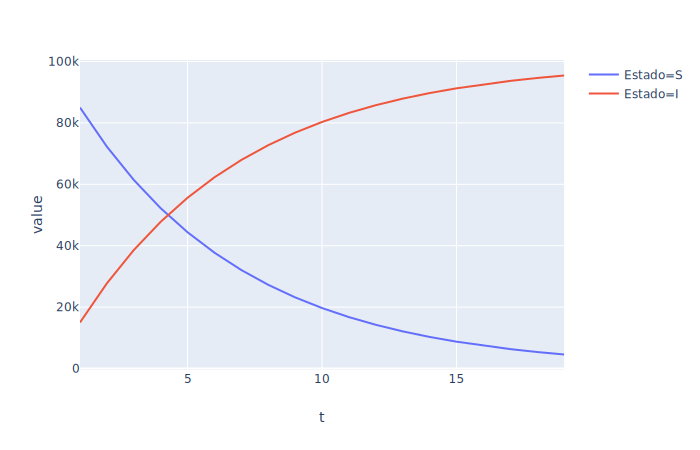

In [333]:
broad= broad.melt(id_vars=['t'], var_name='Estado')
fig=px.line(broad,x='t',y='value',color='Estado',height=400,width=600)
fig.show(renderer="svg")

Aca hago simplemente $I_t=S_0-[S_0(1-p)^t]$

In [334]:
t= np.arange(1,20,1)
p= 0.15
s=1000000

broad= pd.DataFrame({'t':t})
broad['I']= 1000000-(1000000*(1-p)**broad.t)
broad.head()

,t,I
0,1,150000.0000
1,2,277500.0000
2,3,385875.0000
3,4,477993.7500
4,5,556294.6875


#### Ajustando el modelo a datos

Una vez que sabemos que **TIPO DE MODELO (con las suposiciones del modelo)** es, podemos acercarlo a los datos de la realidad para sacar conclusiones especificas del caso.

Usando datos de ventas iniciales, podemos **estimar el tamaño de la poblacion**. Como estamos suponiendo que **todos se van a enterar en algun momento**, podemos ver a la velocidad que se enteran en unos periodos para estimar la cantidad de gente que hay en esa poblacion: Hay 20000 enterados en periodo 1 y 36000 en periodo 2.

- Periodo 1: $I_1=20000=P*N$
- Periodo 2: $I_2=36000=20000+P*(N-20000)$
- Periodo 3: $I_3=49000=36000+P*(N-36000)$
- Solucion: $P=0.2$ y $N=100000$

Entonces, si queremos **proyectar**, segun este modelo, **cuanta gente se va a enterar**, comenzamos pensando que hay un numero de gente que es la poblacion total, y un porcentaje que es el fijo que la gente se entera (porque asumimos que solo se enteran por unico medio). Sabemos que estan ahi pero no cuales son. Si los primeros resultados son 20000, sabemos que eso tiene que ser $P*N$, entonces con un dato mas ya podemos estimar como es la curva y ver donde termina.

### Diffusion Model

#### Cuando una persona se infecta, esa persona tiene una probabilidad de pasarselo a las personas con las que tiene contacto. 
La expansion se hace **de individuo a individuo**. No se considera la "eleccion" en este modelo (que la persona que se expone decida informarse (como adoptar una nueva tecnologia), sino que lo absorbemos en la probabilidad (si la tecnologia/idea es buena, va a tener mas prob de contagio).

La gente se informa/infecta cuando: 
- **Probabilidad de contacto**: tiene contacto con una persona infectada
- **Probabilidad de contagio**: le pasa la idea/enfermedad

Son dos eventos que varian segun el contexto (por ej en ciudades la probabilidad de contacto es mayor) y las noticias jugosas (de aliens) tienen mas llegada/ probabilidad de contagio que otras.

- **DIFUSSION PROBABILIY**: es el producto de de la **probabilidad de contacto** y la **probabilidad de contagio**.

**Suposicion**: el modelo asume **random mixing**: que dos personas cualquiera en una poblacion tienen la misma probabilidad de contactarse (a diferencia de otros como los de redes).

#### $$I_{t+1}=I_t+P_{diffuse}*\frac{I_t}{N}*S_t$$

donde $P_{diffuse}=P_{spread}*P_{contact}$. Como ahora no se contagia mas de una sola fuente, el nivel de contagio esta influido por la gente que ya esta contagiada. Por eso se le agrega el **porcentaje de gente contagiada**. 

- $\frac{I_t}{N}$: llegada o alcance. Cantidad relativa de los medios de difusion
- $P_{contact}$: facilidad de encontrarme o exponerme a esas personas infectadas
- $P_{spread}$: peligrosidad de, una vez que me encuentro con alguien, de que me lo pase

Todos esos son porcentajes. Si eso se lo aplicamos a las personas que estan susceptibles, nos da la cantidad de gente que va a infectarse. A su vez, $\frac{I_t}{N}$ se compensa con $S_t$, porque si aumenta el primero, disminuye el segundo.

Es como pensar: la probabilidad de que me contagie depende del porcentaje de gente contagiada $\frac{I_t}{N}$ (porque es el alcance que tiene), despues de la probabilidad de que me encuentre una de esas personas $P_{contact}$ (segun ciertos recaudos o condiciones como el aislamiento) y despues de que contagie $P_{spread}$ (como ciertas medidas de higiene. 

In [335]:
t= np.arange(1,400,1)
N= 1000000

p= 0.05
df= pd.DataFrame({'t':t})
df['I']= 1
df['S']= N
df['p']=p
for i in t:
    df.loc[i+1,'I']= df.loc[i,'I'] + p * df.loc[i,'S']  * df.loc[i,'I']/N
    df.loc[i+1,'S']= N-df.loc[i+1,'I']

p= 0.1
df2= pd.DataFrame({'t':t})
df2['I']= 1
df2['S']= N
df2['p']=p
for i in t:
    df2.loc[i+1,'I']= df2.loc[i,'I'] + p * df2.loc[i,'S']  * df2.loc[i,'I']/N
    df2.loc[i+1,'S']= N-df2.loc[i+1,'I']

p= 0.25
df3= pd.DataFrame({'t':t})
df3['I']= 1
df3['S']= N
df3['p']=p
for i in t:
    df3.loc[i+1,'I']= df3.loc[i,'I'] + p * df3.loc[i,'S']  * df3.loc[i,'I']/N
    df3.loc[i+1,'S']= N-df3.loc[i+1,'I']
  
p= 0.40
df4= pd.DataFrame({'t':t})
df4['I']= 1
df4['S']= N
df4['p']=p
for i in t:
    df4.loc[i+1,'I']= df4.loc[i,'I'] + p * df4.loc[i,'S']  * df4.loc[i,'I']/N
    df4.loc[i+1,'S']= N-df4.loc[i+1,'I']
    
df= pd.concat([df,df2,df3,df4])
df= df.dropna().reset_index(drop=True)
df.head()

,t,I,S,p
0,1.0,1.000000,1000000.000000,0.05
1,2.0,1.000000,1000000.000000,0.05
2,3.0,1.050000,999998.950000,0.05
3,4.0,1.102500,999998.897500,0.05
4,5.0,1.157625,999998.842375,0.05


In [336]:
df= df.melt(id_vars=['t','p'], value_vars=['I','S'] ,var_name='Estado')

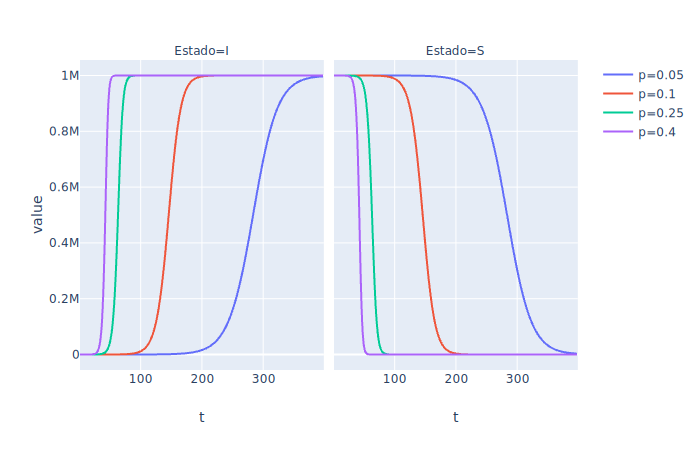

In [337]:
fig=px.line(df,x='t',y='value',color='p',facet_col='Estado', height=400,width=600)
fig.show(renderer="svg")

Otra suposicion es que **todos se terminan informando**. Tiene una forma de S. En el modelo de broadcasting, estimar la poblacion era facil porque se correlaciona muy bien con los informados iniciales. En este no. Puede empezar tranquilo en los dos y uno llegar a una poblacion muy grande y otra que empezo mejor llegar a una mas chica nada mas. Es dificil darse cuenta de entrada cual es la poblacion final al que se va a llegar.

#### Si le sacamos $P$, nos queda asi, es mas abrupto. $P$ le agrega un factor mas para que se relentice la expansion (que no sea tan abrupta

In [338]:
t= np.arange(1,150,1)
N= 1000000

p= 0.05
df= pd.DataFrame({'t':t})
df['I']= 1
df['S']= N
df['p']='sin p'
for i in t:
    df.loc[i+1,'I']= df.loc[i,'I'] +  df.loc[i,'S']  * df.loc[i,'I']/N
    df.loc[i+1,'S']= N-df.loc[i+1,'I']


p= 0.15
df2= pd.DataFrame({'t':t})
df2['I']= 1
df2['S']= N
df2['p']='0,15'
for i in t:
    df2.loc[i+1,'I']= df2.loc[i,'I'] + p * df2.loc[i,'S']  * df2.loc[i,'I']/N
    df2.loc[i+1,'S']= N-df2.loc[i+1,'I']
    
df= pd.concat([df,df2])
df= df.dropna().reset_index(drop=True)
df.head()

,t,I,S,p
0,1.0,1.000000,1000000.000000,sin p
1,2.0,1.000000,1000000.000000,sin p
2,3.0,2.000000,999998.000000,sin p
3,4.0,3.999996,999996.000004,sin p
4,5.0,7.999976,999992.000024,sin p


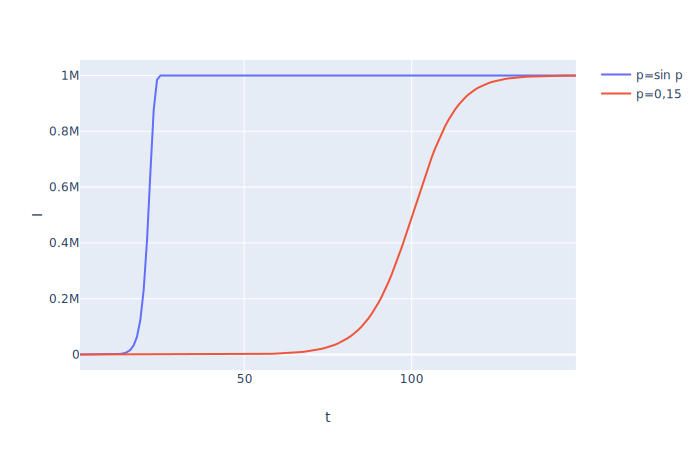

In [339]:
fig=px.line(df,x='t',y='I',color='p', height=400,width=600)
fig.show(renderer="svg")

### Bass Model

La mayoria de los bienes e  informacion es expanden mediante **ambos broadcast y difusion**. La difference equation del Bass es la suma de la difference equation del broadcast y del de difusion. Mientras mayor sea $P_{diffusion}$, mas parecido a un S-shape es.

#### $$I_{t+1}= I_t + [P_{broad}*S_t] + [P_{diffuse}*\frac{I_t}{N}*S_t]$$

Ya que $S_t = [(1-\frac{I_t}{N})*N]$, si lo distribuyo, es lo mismo que:

#### $I_{t+1}= I_t + (P_{broad} + P_{diffuse}*\frac{I_t}{N})*(1-\frac{I_t}{N})*N$ 

Entonces el cambio en porcentaje de infectados sobre el total es:

$\Delta \frac{I_t}{N}= (P_{broad} + P_{diffuse}*\frac{I_t}{N})*(1-\frac{I_t}{N})$

$\Delta I_t= (P_{broad} + P_{diffuse}*\frac{I_t}{N})*(1-\frac{I_t}{N})*N$

$\Delta I_t= (P_{broad} + P_{diffuse}*\frac{I_t}{N})*S_t$

$\Delta I_t= [P_{broad}*S_t] + [P_{diffuse}*\frac{I_t}{N}*S_t]$ ecuacion original del libro

Situaciones:

- Cuando $I_t≈N --> I_{t+1}≈0$
- Cuando $I_t=0 --> I_{t+1}=P_{broad}*N$
- Cuando $\frac{I_t}{N}=\epsilon --> I_{t+1}=(P_{broad} + P_{dif}*\epsilon)*S_t$

Lo bueno de este modelo es que al ser tan simple, no se necesita mucha data para estimar los parametros y completar el modelo.

In [340]:
t= np.arange(1,50,1)
N= 1000000

p_d= 0.3
p_b= 0.01
df= pd.DataFrame({'t':t})
df['I']= 0
df['S']= N
df['p']='b=0.01, d=0.3'
for i in t:
    df.loc[i+1,'I']= df.loc[i,'I'] + p_b*df.loc[i,'S'] +  df.loc[i,'S'] * p_d * df.loc[i,'I']/N # forma 1
    df.loc[i+1,'S']= N-df.loc[i+1,'I']


p_d= 0.1
p_b= 0.01
df2= pd.DataFrame({'t':t})
df2['I']= 0
df2['S']= N
df2['p']='b=0.05, d=0.15'
for i in t:
    df2.loc[i+1,'I']= df2.loc[i,'I'] + ((p_b+ p_d*df2.loc[i,'I']/N)*(1-df2.loc[i,'I']/N)*N) # forma 2
    df2.loc[i+1,'S']= N-df2.loc[i+1,'I']
    
df= pd.concat([df,df2])
df= df.dropna().reset_index(drop=True)
df.head()

,t,I,S,p
0,1.0,0.00000,1000000.00000,"b=0.01, d=0.3"
1,2.0,0.00000,1000000.00000,"b=0.01, d=0.3"
2,3.0,10000.00000,990000.00000,"b=0.01, d=0.3"
3,4.0,22870.00000,977130.00000,"b=0.01, d=0.3"
4,5.0,39345.38893,960654.61107,"b=0.01, d=0.3"


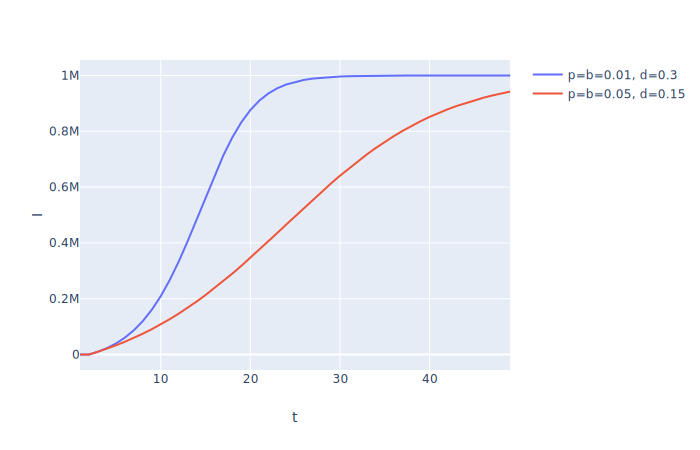

In [341]:
fig=px.line(df,x='t',y='I',color='p', height=400,width=600)
fig.show(renderer="svg")

### SIR Model

En los modelos anteriores, una persona que adopta una tecnologia o adquiere una enfermedad o informacion, nunca la pierde. Si queremos modelar que los individuos puedan abandonar el estado de infectado, usamos otro estado mas, **recuperado/removido**.
- S: susceptible
- I: infectado/informado
- R: recuperado/removido

Asumimos que los que se recuperan vuelven a entrar a los susceptibles.

#### $$I_{t+1}=I_t + [P_{contact}*P_{spread}*\frac{I_t}{N}*S_t] - [P_{recover}*I_t]$$

El modelo SIR produce un **tipping point** conocido como **basic reproduction number, $R_0$ (numero basico de reproduccion)**: el ratio de la probabilidad de contacto y de espread con la probabilidad de recuperacion:
#### $$R_0 = \frac{P_{contact}*P_{spread}}{P_{recover}}$$

Si es >1, se puede expandir a la poblacion. Si es <1, se disipan. En este modelo, **no debe expandirse a toda la poblacion necesariamente**. Si lo hace o no, depende de $R_0$. Las medidas que se toman son para reducir esta metrica. Por ejemplo se puede vacunar. No es necesario vacunar a todos. Lo necesario es que la proporcion de vacunados, $V>= \frac{R_0-1}{R_0}$. Si $R_0$ es mayor, se necesita una proporcion de vacunados mayor.


In [342]:
t= np.arange(1,150,1)
N= 1000000

p_con= 0.6
p_spr= 0.6
p_rec= 0.1
df= pd.DataFrame({'t':t})
df['I']= 1
df['S']= N
df['R_0']= p_con*p_spr/p_rec
for i in t:
    df.loc[i+1,'I']= df.loc[i,'I'] + [p_con*p_spr*df.loc[i,'I']/N*df.loc[i,'S']] - [p_rec*df.loc[i,'I']] 
    df.loc[i+1,'S']= N-df.loc[i+1,'I']


p_con= 0.6
p_spr= 0.9
p_rec= 0.4
df2= pd.DataFrame({'t':t})
df2['I']= 1
df2['S']= N
df2['R_0']= p_con*p_spr/p_rec
for i in t:
    df2.loc[i+1,'I']= df2.loc[i,'I'] + [p_con*p_spr*df2.loc[i,'I']/N*df2.loc[i,'S']] - [p_rec*df2.loc[i,'I']] 
    df2.loc[i+1,'S']= N-df2.loc[i+1,'I']

p_con= 0.6
p_spr= 0.4
p_rec= 0.4
df3= pd.DataFrame({'t':t})
df3['I']= 1
df3['S']= N
df3['R_0']= p_con*p_spr/p_rec
for i in t:
    df3.loc[i+1,'I']= df3.loc[i,'I'] + [p_con*p_spr*df3.loc[i,'I']/N*df3.loc[i,'S']] - [p_rec*df3.loc[i,'I']] 
    df3.loc[i+1,'S']= N-df3.loc[i+1,'I']    

df= pd.concat([df,df2,df3],sort=True)
df= df.dropna().reset_index(drop=True)
df.head()

,I,R_0,S,t
0,1.000000,3.6,1000000.000000,1.0
1,1.000000,3.6,1000000.000000,2.0
2,1.260000,3.6,999998.740000,3.0
3,1.587599,3.6,999998.412401,4.0
4,2.000374,3.6,999997.999626,5.0


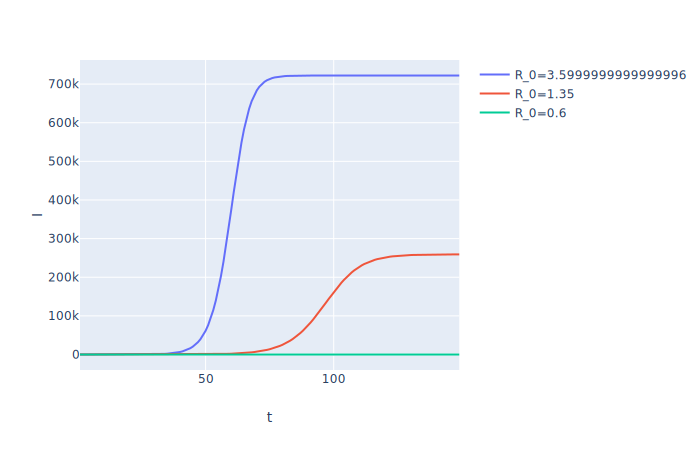

In [343]:
fig= px.line(df,x='t',y='I',color='R_0', height=400,width=600)
fig.show(renderer="svg")

#### SIR en networks

El SIR comun asume random mixing. Si metemos el modelo en una red, vemos la importancia de la distribucion de grados en la transmision. En un **hub-and-spoke network**, hay ciertos individuos muy conectados. De esta forma, si un hub esta infectado, puede infectar a todos los demas en muy poco tiempo. Incluso si lo tiene otro, se lo va a pasar al hub y este va a infectar a los demas. Para este caso, el $R_0$ no tiene tanta importancia. El **hub es un superspreader**. Si el hub tiene mucho betweenness (conecta con muchas comunidades) puede transmitirlo muy rapido a mucha gente. 

El superspreader/hub tiene mas chances que los demas de pasarlo pero tambien de adquirirlo, por eso **su contribucion es el cuadrado del grado del nodo**.

Los tipping points son muy importantes: hacer un producto un poquito mejor puede empujar la transmision (con el $R_0$) y que se expanda mucho. Hay otros casos donde algo es tan bueno que el $R_0$ esta muy por encima de 1. Justin Bieber tenia un $R_0=24$. Estos tipping points son contextuales: pueden ir cambiando con el contexto... no es que pequeñas decisiones marquen para siempre el camino del sistema (direct tipping points). Estos ultimos ocurren cuando hay situaciones inestables.

En otros casos, esto no es realista, ya que la probabilidad de contagio no varia segun la cantidad de gente que lo tenga, algo que si puede pasar en por ejemplo contextos sociales, donde el contagio se hace mas probablecon mas exposicion, ya que el contagio es una opcion. Lo mismo para pertenecer a un movimiento social, etc. En esos casos, $P_{spread}$ podria variar en funcion de otras cosas.

## 12. Entropy: Modeling Uncertainty